# Machine Learning Report 3 Notebook 1

Import necessary libraries

In [1000]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.mixture
import sklearn.decomposition
import sklearn.random_projection
import sklearn.discriminant_analysis
from sklearn.manifold import Isomap
import time
%matplotlib inline

Generate our clusters as necessary, with lots of parameters that can be changed if so desired.

In [464]:
def gen_clusters(num_dimensions, num_clusters, max_mean, max_sigma, max_num_pts,sigma_select='random'):
    '''
    Args:
    num_dimensions: Number of dimensions that the data will exist in
    num_clusters: Number of clusters selected
    max_mean: The maximum value of the mean, which can vary between (0,max_mean)
    max_sigma: The maximum value of the variance, which can vary between (0,max_sigma)
    max_num_pts: The maximum number of points per cluster
    
    Returns:
    numpy array of n-dimensional points
    dict containing information on the clusters, means, sigmas, and number of points
    '''
    cluster_dict = {}
    for i in range(0,num_clusters):
        means = [np.random.uniform(0,max_mean) for j in range(0,num_dimensions)]
        if sigma_select=='random':
            sigmas = [np.random.uniform(0,max_sigma) for j in range(0,num_dimensions)]
        else:
            sigmas=[max_sigma for j in range(0,num_dimensions)]
        num_pts = int(np.random.uniform(0,max_num_pts))
        cluster_dict.update({i+1:{'means':means,'sigmas':sigmas,'num_pts':num_pts}})
    overall_pts = []
    for i in cluster_dict.values():
        cluster_pts = []
        for j in range(0,len(i['means'])):
            cluster_pts.append(np.random.normal(i['means'][j],i['sigmas'][j],num_pts).tolist())
        cluster_pts = zip(*cluster_pts)
        i['pts'] = cluster_pts
        overall_pts+=cluster_pts
    return cluster_dict, overall_pts

A brief sanity check, making sure everything works...

In [65]:
cluster_dict,overall_pts = gen_clusters(4,6,100,5,500) #Num dims, num clusters, max_mean, max_sigma, max_pts

Looks good to me!

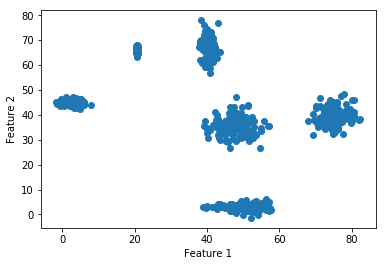

In [96]:
plt.figure()
plt.scatter([i[0] for i in overall_pts],[i[1] for i in overall_pts])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Task 1.1: K-Means Clustering

In [617]:
def run_kmeans(overall_pts,num_clusters,cluster_dict):
    start_time = time.time()
#    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters, random_state=0).fit(overall_pts)
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters).fit(overall_pts)
    time_total = time.time()-start_time #Will return in units of seconds
    ss_error = 0
    if cluster_dict == None:
        pass
    else:
        for realmean in [i['means'] for i in cluster_dict.values()]:
            dist_li = []
            for expmean in kmeans.cluster_centers_:
                dist_li.append(np.linalg.norm(realmean-expmean))
            ss_error+=min(dist_li)**2
    return kmeans.cluster_centers_,kmeans.predict(overall_pts),time_total,ss_error

When the clusters are far away, the calculation is much easier and the error is low.

0.0616691112518
1.4009137775012395


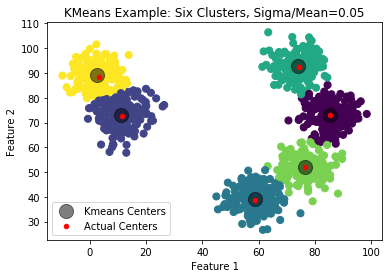

In [497]:
num_dims=2
num_clusters=6
max_mean=100
max_sigma=5
max_pts=1000
cluster_dict,overall_pts = gen_clusters(num_dims,num_clusters,max_mean,max_sigma,max_pts,sigma_select='yes')
cluster_centers, predicted_pts, timeit, ss_error = run_kmeans(overall_pts,num_clusters,cluster_dict)
print timeit
print ss_error
plt.figure()
plt.scatter(np.array(overall_pts)[:, 0], np.array(overall_pts)[:, 1], c=predicted_pts, s=50, cmap='viridis')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5,label='Kmeans Centers')
act_centers = [i['means'] for i in cluster_dict.values()]
plt.scatter([i[0] for i in act_centers],[i[1] for i in act_centers],color='red',s=20,label='Actual Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Example: Six Clusters, Sigma/Mean=0.05')
plt.legend()
plt.show()

By increasing the variance (max_sigma), we can get clusters that are more clumped together, which would lead to more difficulties in assessing which points belong with which clusters.

0.183843135834
13.624639831412582


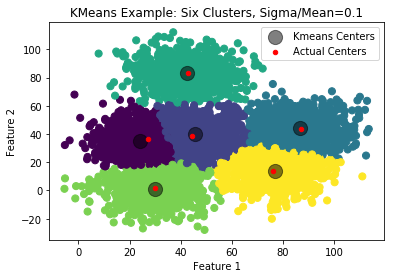

In [495]:
num_dims=2
num_clusters=6
max_mean=100
max_sigma=10
max_pts=1000
cluster_dict,overall_pts = gen_clusters(num_dims,num_clusters,max_mean,max_sigma,max_pts,sigma_select='yes')
cluster_centers, predicted_pts, timeit, ss_error = run_kmeans(overall_pts,num_clusters,cluster_dict)
print timeit
print ss_error
plt.figure()
plt.scatter(np.array(overall_pts)[:, 0], np.array(overall_pts)[:, 1], c=predicted_pts, s=50, cmap='viridis')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5,label='Kmeans Centers')
act_centers = [i['means'] for i in cluster_dict.values()]
plt.scatter([i[0] for i in act_centers],[i[1] for i in act_centers],color='red',s=20,label='Actual Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Example: Six Clusters, Sigma/Mean=0.1')
plt.legend()
plt.show()

As the clusters get even closer together, it becomes more unclear when performing kmeans which cluster the data belongs to. This can be seen with the gray markers (Kmeans generated clusters) drifting away from the actual cluster centers.

0.238273859024
1313.6912508560724


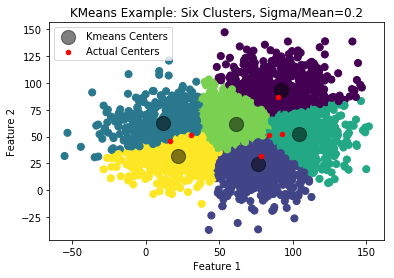

In [494]:
num_dims=2
num_clusters=6
max_mean=100
max_sigma=20
max_pts=1000
cluster_dict,overall_pts = gen_clusters(num_dims,num_clusters,max_mean,max_sigma,max_pts,sigma_select='yes')
cluster_centers, predicted_pts, timeit, ss_error = run_kmeans(overall_pts,num_clusters,cluster_dict)
print timeit
print ss_error
plt.figure()
plt.scatter(np.array(overall_pts)[:, 0], np.array(overall_pts)[:, 1], c=predicted_pts, s=50, cmap='viridis')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5,label='Kmeans Centers')
act_centers = [i['means'] for i in cluster_dict.values()]
plt.scatter([i[0] for i in act_centers],[i[1] for i in act_centers],color='red',s=20,label='Actual Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Example: Six Clusters, Sigma/Mean=0.2')
plt.legend()
plt.show()

How does the error and time change with increasing the number of clusters?

In [578]:
num_dims=2
num_clusters=6
max_mean=100
max_sigma=10
max_pts=1000

n_cluster_time = []
n_cluster_error = []
for n_clusters in range(1,40):
    inter_li_time = []
    inter_li_error = []
    for i in range(0,10):
        cluster_dict,overall_pts = gen_clusters(4,n_clusters,100,10,1000,sigma_select='yes')
        cluster_centers, predicted_pts, timeit, ss_error = run_kmeans(np.array(overall_pts),num_clusters,cluster_dict)
        inter_li_time.append(timeit)
        inter_li_error.append(ss_error)
    n_cluster_time.append(np.average(inter_li_time))
    n_cluster_error.append(np.average(inter_li_error))

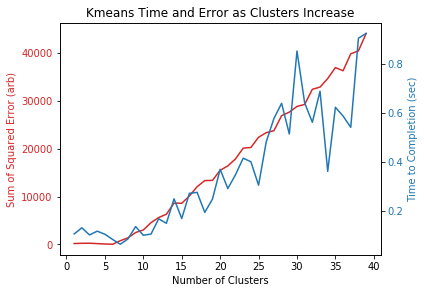

In [505]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot(range(1,40), n_cluster_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,40), n_cluster_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Kmeans Time and Error as Clusters Increase')
plt.show()

How does the error and time change with increasing the number of dimensions?

In [509]:
n_dims_time = []
n_dims_error = []
for n_dims in range(1,30):
    inter_li_time = []
    inter_li_error = []
    for i in range(0,20):
        cluster_dict,overall_pts = gen_clusters(num_dims,8,100,10,1000,sigma_select='yes')
        cluster_centers, predicted_pts, timeit, ss_error = run_kmeans(np.array(overall_pts),num_clusters,cluster_dict)
        inter_li_time.append(timeit)
        inter_li_error.append(ss_error)
    n_dims_time.append(np.average(inter_li_time))
    n_dims_error.append(np.average(inter_li_error))

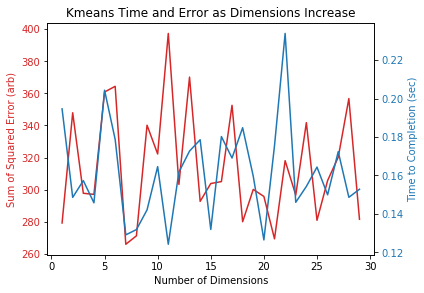

In [510]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Dimensions')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot(range(1,30), n_dims_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,30), n_dims_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Kmeans Time and Error as Dimensions Increase')
plt.show()

How does the error and time change with increasing the number of standard deviation (variance)?

In [511]:
n_sigma_time = []
n_sigma_error = []
for n_sigma in range(5,51,5):
    inter_li_time = []
    inter_li_error = []
    for i in range(0,20):
        cluster_dict,overall_pts = gen_clusters(2,8,100,n_sigma,1000,sigma_select='yes')
        cluster_centers, predicted_pts, timeit, ss_error = run_kmeans(np.array(overall_pts),num_clusters,cluster_dict)
        inter_li_time.append(timeit)
        inter_li_error.append(ss_error)
    n_sigma_time.append(np.average(inter_li_time))
    n_sigma_error.append(np.average(inter_li_error))

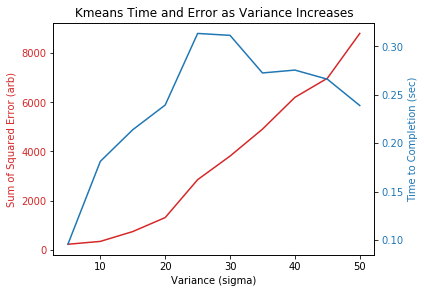

In [512]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Variance (sigma)')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot(range(5,51,5), n_sigma_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(5,51,5), n_sigma_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Kmeans Time and Error as Variance Increases')
plt.show()

### Task 1.2: Expectation Maximization

In [721]:
def run_exp_max(overall_pts,num_clusters,cluster_dict,init_params='random'):
    dims = len(cluster_dict[cluster_dict.keys()[0]]['pts'][0])
    start_time = time.time()
    exp_max = sklearn.mixture.GaussianMixture(n_components=len(cluster_dict),init_params=init_params,max_iter=1000)
    r = exp_max.fit(overall_pts)
    time_total = time.time()-start_time
    ss_error = 0
    for realmean in [i['means'] for i in cluster_dict.values()]:
        dist_li = []
        for expmean in r.means_:
            dist_li.append(np.linalg.norm(realmean-expmean))
        ss_error+=min(dist_li)**2
    return r.means_, r.predict(overall_pts), r.weights_, time_total, ss_error

0.0398941040039
0.09125021521409099
[[13.60457802 53.29317677]
 [66.22012242 23.19707514]
 [48.86295644 97.82573546]
 [37.32901191 25.44159104]
 [88.97659027 24.96069757]
 [ 5.6096347  40.5897932 ]]


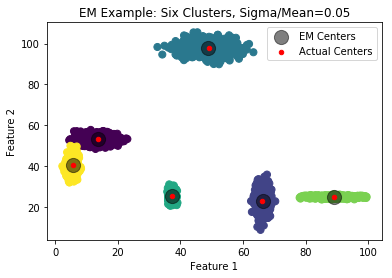

In [610]:
num_dims=2
num_clusters=6
max_mean=100
max_sigma=5
max_pts=1000
cluster_dict,overall_pts = gen_clusters(num_dims,num_clusters,max_mean,max_sigma,max_pts)
cluster_centers, predicted_pts, weights, timeit, ss_error = run_exp_max(overall_pts,num_clusters,\
                                                                        cluster_dict,init_params='kmeans')
print timeit
print ss_error
print cluster_centers
plt.figure()
plt.scatter(np.array(overall_pts)[:, 0], np.array(overall_pts)[:, 1], c=predicted_pts, s=50, cmap='viridis')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5,label='EM Centers')
act_centers = [i['means'] for i in cluster_dict.values()]
plt.scatter([i[0] for i in act_centers],[i[1] for i in act_centers],color='red',s=20,label='Actual Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM Example: Six Clusters, Sigma/Mean=0.05')
plt.legend()
plt.show()

0.0574369430542
0.5242731815733664
[[74.71629145 98.55503298]
 [53.56911525 52.63549836]
 [46.90021173 21.02483293]
 [47.20377263 98.54645239]
 [32.03120032 57.91807716]
 [65.90151305 53.08583807]]


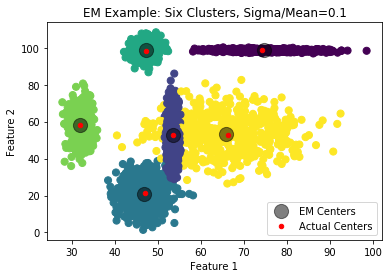

In [608]:
num_dims=2
num_clusters=6
max_mean=100
max_sigma=10
max_pts=1000
cluster_dict,overall_pts = gen_clusters(num_dims,num_clusters,max_mean,max_sigma,max_pts)
cluster_centers, predicted_pts, weights, timeit, ss_error = run_exp_max(overall_pts,num_clusters,\
                                                                        cluster_dict,init_params='kmeans')
print timeit
print ss_error
print cluster_centers
plt.figure()
plt.scatter(np.array(overall_pts)[:, 0], np.array(overall_pts)[:, 1], c=predicted_pts, s=50, cmap='viridis')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5,label='EM Centers')
act_centers = [i['means'] for i in cluster_dict.values()]
plt.scatter([i[0] for i in act_centers],[i[1] for i in act_centers],color='red',s=20,label='Actual Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM Example: Six Clusters, Sigma/Mean=0.1')
plt.legend()
plt.show()

0.111509084702
7.659118453698869
[[44.15371578 13.45416826]
 [96.92742632 88.00138949]
 [13.32164004 35.35609353]
 [16.26729956 62.75757274]
 [60.41131232 32.02743314]
 [97.02142164 75.32233238]]


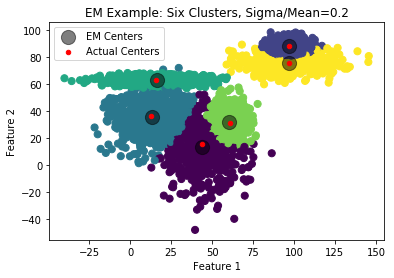

In [606]:
num_dims=2
num_clusters=6
max_mean=100
max_sigma=20
max_pts=1000
cluster_dict,overall_pts = gen_clusters(num_dims,num_clusters,max_mean,max_sigma,max_pts)
cluster_centers, predicted_pts, weights, timeit, ss_error = run_exp_max(overall_pts,num_clusters,\
                                                                        cluster_dict,init_params='kmeans')
print timeit
print ss_error
print cluster_centers
plt.figure()
plt.scatter(np.array(overall_pts)[:, 0], np.array(overall_pts)[:, 1], c=predicted_pts, s=50, cmap='viridis')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5,label='EM Centers')
act_centers = [i['means'] for i in cluster_dict.values()]
plt.scatter([i[0] for i in act_centers],[i[1] for i in act_centers],color='red',s=20,label='Actual Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM Example: Six Clusters, Sigma/Mean=0.2')
plt.legend()
plt.show()

How does the error and time change with increasing the number of clusters?

In [583]:
num_dims=2
num_clusters=6
max_mean=100
max_sigma=10
max_pts=1000

em_cluster_time = []
em_cluster_error = []
for n_clusters in range(1,40):
    print n_clusters
    inter_li_time = []
    inter_li_error = []
    for i in range(0,10):
        cluster_dict,overall_pts = gen_clusters(4,n_clusters,100,10,1000)
        cluster_centers, predicted_pts, weights, timeit, ss_error = run_exp_max(np.array(overall_pts),\
                                                                                num_clusters,cluster_dict)
        inter_li_time.append(timeit)
        inter_li_error.append(ss_error)
    em_cluster_time.append(np.average(inter_li_time))
    em_cluster_error.append(np.average(inter_li_error))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


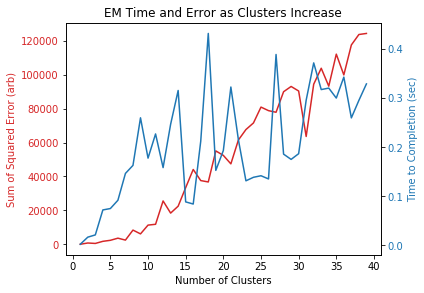

In [584]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot(range(1,40), em_cluster_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,40), em_cluster_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('EM Time and Error as Clusters Increase')
plt.show()

How does the error and time change with increasing the number of dimensions?

In [586]:
em_dims_time = []
em_dims_error = []
for n_dims in range(1,30):
    inter_li_time = []
    inter_li_error = []
    for i in range(0,20):
        cluster_dict,overall_pts = gen_clusters(num_dims,8,100,10,1000,sigma_select='yes')
        cluster_centers, predicted_pts, weights, timeit, ss_error = run_exp_max(np.array(overall_pts),\
                                                                       num_clusters,cluster_dict)
        inter_li_time.append(timeit)
        inter_li_error.append(ss_error)
    em_dims_time.append(np.average(inter_li_time))
    em_dims_error.append(np.average(inter_li_error))

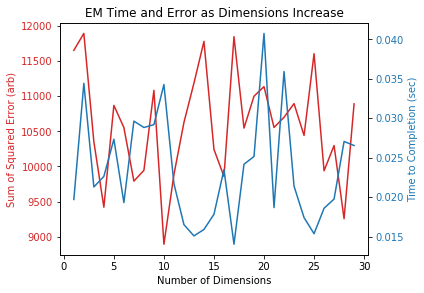

In [587]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Dimensions')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot(range(1,30), em_dims_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,30), em_dims_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('EM Time and Error as Dimensions Increase')
plt.show()

What about changing the variance?

In [596]:
em_sigma_time = []
em_sigma_error = []
for n_sigma in range(2,51,2):
    inter_li_time = []
    inter_li_error = []
    for i in range(0,50):
        cluster_dict,overall_pts = gen_clusters(2,8,100,n_sigma,1000,sigma_select='yes')
        try:
            cluster_centers, predicted_pts, weights, timeit, ss_error = run_exp_max(np.array(overall_pts),\
                                                                                   num_clusters,cluster_dict)
        except IndexError:
            pass
        inter_li_time.append(timeit)
        inter_li_error.append(ss_error)
    em_sigma_time.append(np.average(inter_li_time))
    em_sigma_error.append(np.average(inter_li_error))

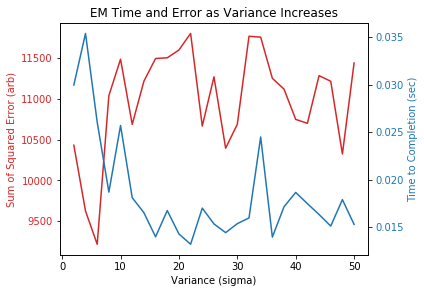

In [597]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Variance (sigma)')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot(range(2,51,2), em_sigma_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(2,51,2), em_sigma_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('EM Time and Error as Variance Increases')
plt.show()

### Task 1.3: Principal Component Analysis (PCA)

In [950]:
#Num dims, num clusters, max_mean, max_sigma, max_pts
def run_pca(overall_pts,num_clusters,cluster_dict,plot=False):
    start_time = time.time()
    PCA = sklearn.decomposition.PCA(n_components=2)
    PCA.fit(overall_pts)
    t = PCA.fit_transform(overall_pts)
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters).fit(t)
    cluster_centers = kmeans.cluster_centers_
    actual_centers = PCA.fit_transform([i['means'] for i in cluster_dict.values()])
    cluster_centers_full = PCA.inverse_transform(cluster_centers)
    if plot:
        plt.figure()
        plt.scatter(np.array(t)[:, 0], np.array(t)[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5,label='PCA Centers')
        plt.scatter([i[0] for i in actual_centers],[i[1] for i in actual_centers],color='red',label='Actual Centers')
        plt.xlabel('PCA Feature 1')
        plt.ylabel('PCA Feature 2')
        plt.title('PCA with K-Means in 2D')
        plt.legend()
        plt.show()
    
    ss_error = 0
    for realmean in [i['means'] for i in cluster_dict.values()]:
        dist_li = []
        for expmean in cluster_centers_full:
            dist_li.append(np.linalg.norm(realmean-expmean))
        ss_error+=min(dist_li)**2
    total_time = time.time()-start_time
    return cluster_centers_full, cluster_centers, total_time, ss_error

5


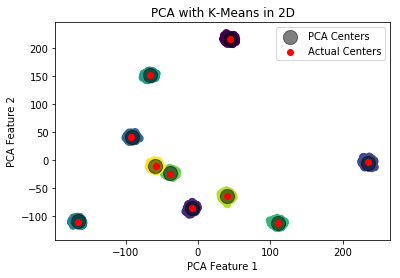

10


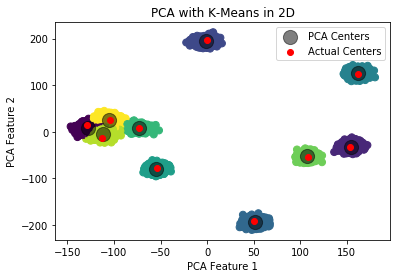

20


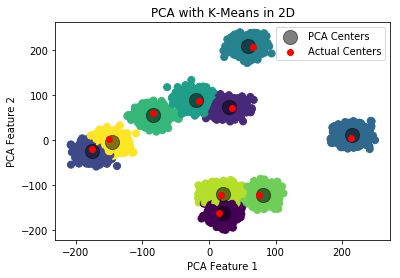

In [720]:
num_dims = 100
for max_sigma in [5,10,20]:
    print max_sigma
    cluster_dict,overall_pts = gen_clusters(num_dims,10,max_mean,max_sigma,1000)
    cluster_centers_full, cluster_centers, timeit, ss_error = run_pca(overall_pts,10,cluster_dict,plot=True)


How does the error and time change with increasing the number of clusters?

In [951]:
num_dims = 100
pca_cluster_time_li = []
pca_cluster_err_li = []
max_sigma = 10
#for max_sigma in range(2,32,2):
for num_clusters in range(5,51,5):
    print num_clusters
    inter_time_li = []
    inter_err_li = []
    for i in range(0,10):
        cluster_dict,overall_pts = gen_clusters(num_dims,num_clusters,max_mean,max_sigma,1000)
        cluster_centers_full, cluster_centers, timeit, ss_error = run_pca(overall_pts,10,cluster_dict)
        inter_time_li.append(timeit)
        inter_err_li.append(ss_error)
    pca_cluster_time_li.append(np.average(inter_time_li))
    pca_cluster_err_li.append(np.average(inter_err_li))

5
10
15
20
25
30
35
40
45
50


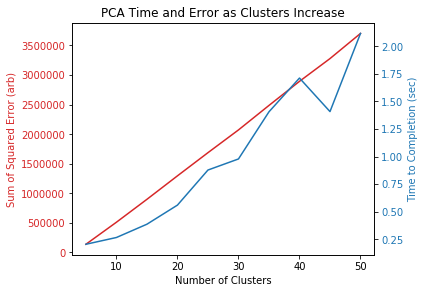

In [952]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot(range(5,51,5), pca_cluster_err_li, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(5,51,5), pca_cluster_time_li, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('PCA Time and Error as Clusters Increase')
plt.show()

How does the error and time change with increasing the number of dimensions?

In [953]:
max_sigma = 10
num_clusters=10
pca_dims_time = []
pca_dims_error = []
for n_dims in [5,10,50,100,200,300,500]:
    print 'Dimensions: '+str(n_dims)
    inter_li_time = []
    inter_li_error = []
    for i in range(0,10):
        cluster_dict,overall_pts = gen_clusters(n_dims,num_clusters,100,max_sigma,100,sigma_select='yes')
        cluster_centers_full, cluster_centers, timeit, ss_error = run_pca(np.array(overall_pts),\
                                                                       num_clusters,cluster_dict)
        inter_li_time.append(timeit)
        inter_li_error.append(ss_error)
    pca_dims_time.append(np.average(inter_li_time))
    pca_dims_error.append(np.average(inter_li_error))

Dimensions: 5
Dimensions: 10
Dimensions: 50
Dimensions: 100
Dimensions: 200
Dimensions: 300
Dimensions: 500


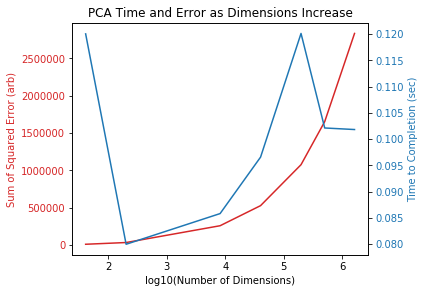

In [954]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('log10(Number of Dimensions)')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot([np.log(i) for i in [5,10,50,100,200,300,500]], pca_dims_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot([np.log(i) for i in [5,10,50,100,200,300,500]], pca_dims_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('PCA Time and Error as Dimensions Increase')
plt.show()

What about changing the variance?

In [955]:
pca_sigma_time = []
pca_sigma_error = []
for n_sigma in range(2,31,2):
    print n_sigma
    inter_li_time = []
    inter_li_error = []
    for i in range(0,30):
        cluster_dict,overall_pts = gen_clusters(100,8,100,n_sigma,1000,sigma_select='yes')
        cluster_centers_full, cluster_centers, timeit, ss_error = run_pca(np.array(overall_pts),\
                                                                               num_clusters,cluster_dict)
        inter_li_time.append(timeit)
        inter_li_error.append(ss_error)
    pca_sigma_time.append(np.average(inter_li_time))
    pca_sigma_error.append(np.average(inter_li_error))

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30


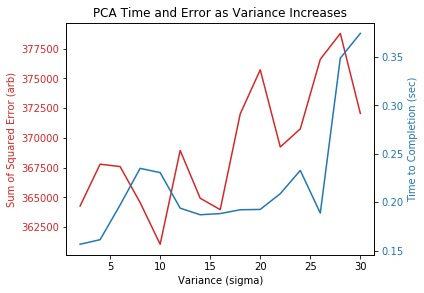

In [956]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Variance (sigma)')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot(range(2,31,2), pca_sigma_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(2,31,2), pca_sigma_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('PCA Time and Error as Variance Increases')
plt.show()

### Task 1.4: Independent Component Analysis (ICA)

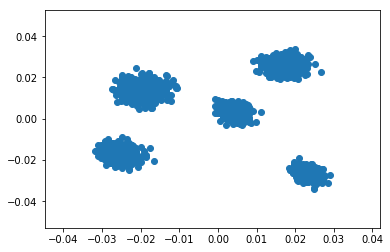

In [417]:
cluster_dict,overall_pts = gen_clusters(10,5,100,10,10000) #Num dims, num clusters, max_mean, max_sigma, max_pts
ICA = sklearn.decomposition.FastICA(n_components=2)
ICA.fit(overall_pts)
#print ICA.components_
#print ICA.mixing_
t = ICA.fit_transform(overall_pts)
plt.figure()
plt.scatter([i[0] for i in t],[i[1] for i in t])
plt.show()

In [957]:
#Num dims, num clusters, max_mean, max_sigma, max_pts
def run_ica(overall_pts,num_clusters,cluster_dict,plot=False):
    start_time = time.time()
    ICA = sklearn.decomposition.FastICA(n_components=2)
    ICA.fit(overall_pts)
    t = ICA.fit_transform(overall_pts)
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters).fit(t)
    cluster_centers = kmeans.cluster_centers_
    actual_centers = ICA.transform([i['means'] for i in cluster_dict.values()])
    cluster_centers_full = ICA.inverse_transform(cluster_centers)
    if plot:
        plt.figure()
        plt.scatter(np.array(t)[:, 0], np.array(t)[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5,label='ICA Centers')
        plt.scatter([i[0] for i in actual_centers],[i[1] for i in actual_centers],color='red',label='Actual Centers')
        plt.xlabel('ICA Feature 1')
        plt.ylabel('ICA Feature 2')
        plt.title('ICA with K-Means in 2D')
        plt.legend()
        plt.show()
    
    ss_error = 0
    for realmean in [i['means'] for i in cluster_dict.values()]:
        dist_li = []
        for expmean in cluster_centers_full:
            dist_li.append(np.linalg.norm(realmean-expmean))
        ss_error+=min(dist_li)**2
    total_time = time.time()-start_time
    return cluster_centers_full, cluster_centers, total_time, ss_error

5


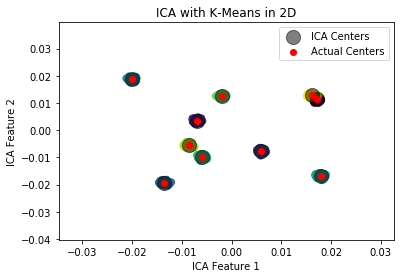

10


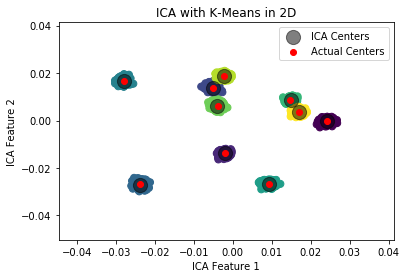

20


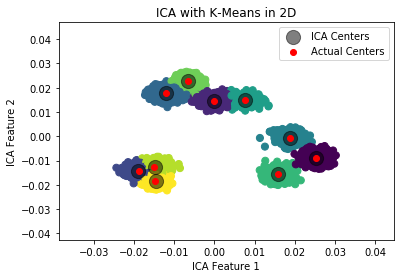

40


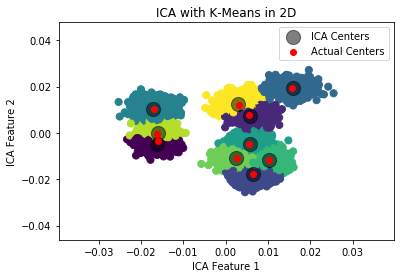

In [958]:
num_dims = 100
for max_sigma in [5,10,20,40]:
    print max_sigma
    cluster_dict,overall_pts = gen_clusters(num_dims,10,max_mean,max_sigma,1000)
    cluster_centers_full, cluster_centers, timeit, ss_error = run_ica(overall_pts,10,cluster_dict,plot=True)


How does the error and time change with increasing the number of clusters?

In [959]:
num_dims = 100
ica_cluster_time_li = []
ica_cluster_err_li = []
max_sigma = 10
#for max_sigma in range(2,32,2):
for num_clusters in range(5,51,5):
    print num_clusters
    inter_time_li = []
    inter_err_li = []
    for i in range(0,10):
        cluster_dict,overall_pts = gen_clusters(num_dims,num_clusters,max_mean,max_sigma,1000)
        cluster_centers_full, cluster_centers, timeit, ss_error = run_ica(overall_pts,10,cluster_dict)
        inter_time_li.append(timeit)
        inter_err_li.append(ss_error)
    ica_cluster_time_li.append(np.average(inter_time_li))
    ica_cluster_err_li.append(np.average(inter_err_li))

5
10
15
20
25
30
35
40
45
50


How does the error and time change with increasing the number of dimensions?

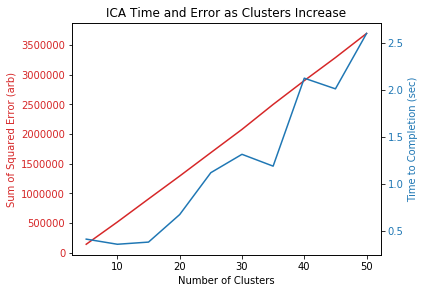

In [960]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot(range(5,51,5), ica_cluster_err_li, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(5,51,5), ica_cluster_time_li, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('ICA Time and Error as Clusters Increase')
plt.show()

In [961]:
max_sigma = 10
num_clusters=10
ica_dims_time = []
ica_dims_error = []
for n_dims in [5,10,50,100,200,300,500]:
    print 'Dimensions: '+str(n_dims)
    inter_li_time = []
    inter_li_error = []
    for i in range(0,10):
        cluster_dict,overall_pts = gen_clusters(n_dims,num_clusters,100,max_sigma,100,sigma_select='yes')
        cluster_centers_full, cluster_centers, timeit, ss_error = run_ica(np.array(overall_pts),\
                                                                       num_clusters,cluster_dict)
        inter_li_time.append(timeit)
        inter_li_error.append(ss_error)
    ica_dims_time.append(np.average(inter_li_time))
    ica_dims_error.append(np.average(inter_li_error))

Dimensions: 5
Dimensions: 10
Dimensions: 50
Dimensions: 100
Dimensions: 200
Dimensions: 300
Dimensions: 500


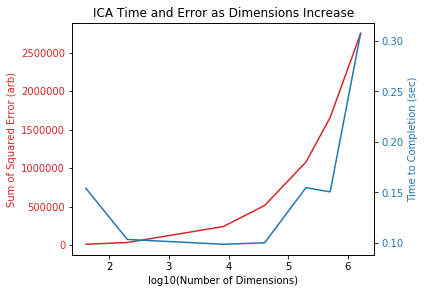

In [962]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('log10(Number of Dimensions)')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot([np.log(i) for i in [5,10,50,100,200,300,500]], ica_dims_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot([np.log(i) for i in [5,10,50,100,200,300,500]], ica_dims_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('ICA Time and Error as Dimensions Increase')
plt.show()

In [963]:
ica_sigma_time = []
ica_sigma_error = []
for n_sigma in range(2,31,2):
    print n_sigma
    inter_li_time = []
    inter_li_error = []
    for i in range(0,30):
        cluster_dict,overall_pts = gen_clusters(100,8,100,n_sigma,1000,sigma_select='yes')
        cluster_centers_full, cluster_centers, timeit, ss_error = run_ica(np.array(overall_pts),\
                                                                               num_clusters,cluster_dict)
        inter_li_time.append(timeit)
        inter_li_error.append(ss_error)
    ica_sigma_time.append(np.average(inter_li_time))
    ica_sigma_error.append(np.average(inter_li_error))

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30


What about changing the variance?

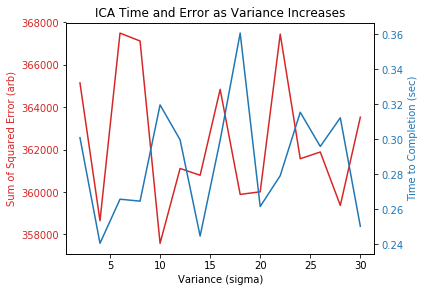

In [964]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Variance (sigma)')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot(range(2,31,2), ica_sigma_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(2,31,2), ica_sigma_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('ICA Time and Error as Variance Increases')
plt.show()

### Task 1.5: Randomized Component Analysis (RCA)

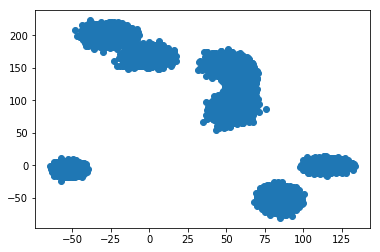

In [444]:
cluster_dict,overall_pts = gen_clusters(10,8,100,5,10000) #Num dims, num clusters, max_mean, max_sigma, max_pts
RCA = sklearn.random_projection.GaussianRandomProjection(2)
RCA.fit(overall_pts)
t = RCA.fit_transform(overall_pts)
plt.figure()
plt.scatter([i[0] for i in t],[i[1] for i in t])
plt.show()

In [965]:
#Num dims, num clusters, max_mean, max_sigma, max_pts
def run_rca(overall_pts,num_clusters,cluster_dict,plot=False):
    start_time = time.time()
    RCA = sklearn.random_projection.GaussianRandomProjection(2)
    RCA.fit(overall_pts)
    t = RCA.fit_transform(overall_pts)
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters).fit(t)
    cluster_centers = kmeans.cluster_centers_
    actual_centers = RCA.transform([i['means'] for i in cluster_dict.values()])
#    cluster_centers_full = RCA.transform(cluster_centers)
    if plot:
        plt.figure()
        plt.scatter(np.array(t)[:, 0], np.array(t)[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5,label='RCA Centers')
        plt.scatter([i[0] for i in actual_centers],[i[1] for i in actual_centers],color='red',label='Actual Centers')
        plt.xlabel('RCA Feature 1')
        plt.ylabel('RCA Feature 2')
        plt.title('RCA with K-Means in 2D')
        plt.legend()
        plt.show()
    c,ICA_compare,ica_t,err = run_ica(overall_pts,num_clusters,cluster_dict)
    ss_error = 0
    for realmean in ICA_compare:
        dist_li = []
        for expmean in cluster_centers:
            dist_li.append(np.linalg.norm(realmean-expmean))
        ss_error+=min(dist_li)**2
    total_time = time.time()-start_time
#    return cluster_centers_full, cluster_centers, timeit, ss_error
    return cluster_centers, total_time, ss_error

5


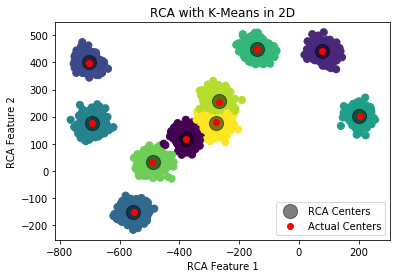

10


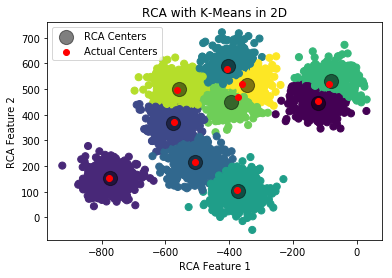

20


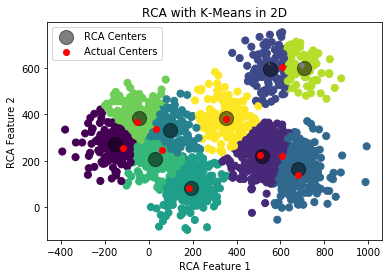

In [966]:
num_dims = 100
for max_sigma in [5,10,20]:
    print max_sigma
    cluster_dict,overall_pts = gen_clusters(num_dims,10,max_mean,max_sigma,1000)
    cluster_centers, timeit, ss_error = run_rca(overall_pts,10,cluster_dict,plot=True)


How does the error and time change with increasing the number of clusters?

In [967]:
num_dims = 100
rca_cluster_time_li = []
rca_cluster_err_li = []
max_sigma = 10
#for max_sigma in range(2,32,2):
for num_clusters in range(5,51,5):
    print num_clusters
    inter_time_li = []
    inter_err_li = []
    for i in range(0,10):
        cluster_dict,overall_pts = gen_clusters(num_dims,num_clusters,max_mean,max_sigma,1000)
        cluster_centers, timeit, ss_error = run_rca(overall_pts,10,cluster_dict)
        inter_time_li.append(timeit)
        inter_err_li.append(ss_error)
    rca_cluster_time_li.append(np.average(inter_time_li))
    rca_cluster_err_li.append(np.average(inter_err_li))

5
10
15
20
25
30
35
40
45
50


How does the error and time change with increasing the number of dimensions?

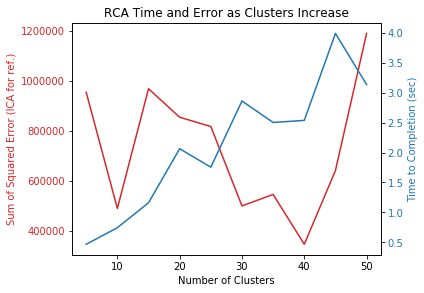

In [968]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Sum of Squared Error (ICA for ref.)', color=color)
ax1.plot(range(5,51,5), rca_cluster_err_li, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(5,51,5), rca_cluster_time_li, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('RCA Time and Error as Clusters Increase')
plt.show()

In [970]:
max_sigma = 10
num_clusters=10
rca_dims_time = []
rca_dims_error = []
for n_dims in [5,10,50,100,200,300,500]:
    print 'Dimensions: '+str(n_dims)
    inter_li_time = []
    inter_li_error = []
    for i in range(0,10):
        try:
            cluster_dict,overall_pts = gen_clusters(n_dims,num_clusters,100,max_sigma,100,sigma_select='yes')
            cluster_centers, timeit, ss_error = run_rca(np.array(overall_pts),\
                                                                           num_clusters,cluster_dict)
            inter_li_time.append(timeit)
            inter_li_error.append(ss_error)
        except:
            pass
    rca_dims_time.append(np.average(inter_li_time))
    rca_dims_error.append(np.average(inter_li_error))

Dimensions: 5
Dimensions: 10
Dimensions: 50
Dimensions: 100
Dimensions: 200
Dimensions: 300
Dimensions: 500


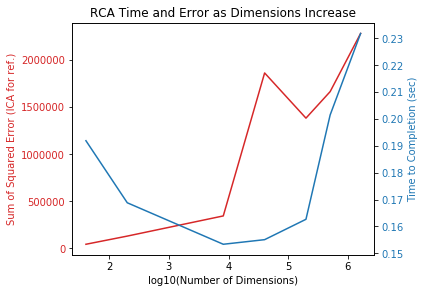

In [971]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('log10(Number of Dimensions)')
ax1.set_ylabel('Sum of Squared Error (ICA for ref.)', color=color)
ax1.plot([np.log(i) for i in [5,10,50,100,200,300,500]], rca_dims_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot([np.log(i) for i in [5,10,50,100,200,300,500]], rca_dims_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('RCA Time and Error as Dimensions Increase')
plt.show()

What about changing the variance?

In [972]:
rca_sigma_time = []
rca_sigma_error = []
for n_sigma in range(2,31,2):
    print n_sigma
    inter_li_time = []
    inter_li_error = []
    for i in range(0,30):
        cluster_dict,overall_pts = gen_clusters(100,8,100,n_sigma,1000,sigma_select='yes')
        try:
            cluster_centers, timeit, ss_error = run_rca(np.array(overall_pts),\
                                                                               num_clusters,cluster_dict)
        except ValueError:
            pass
        inter_li_time.append(timeit)
        inter_li_error.append(ss_error)
    rca_sigma_time.append(np.average(inter_li_time))
    rca_sigma_error.append(np.average(inter_li_error))

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30


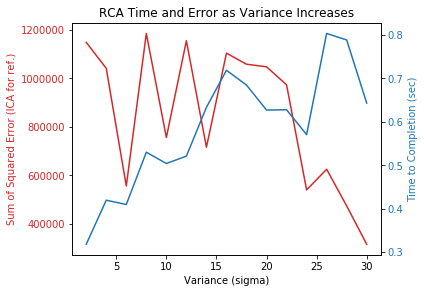

In [973]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Variance (sigma)')
ax1.set_ylabel('Sum of Squared Error (ICA for ref.)', color=color)
ax1.plot(range(2,31,2), rca_sigma_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(2,31,2), rca_sigma_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('RCA Time and Error as Variance Increases')
plt.show()

### Task 1.6: t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [974]:
#Num dims, num clusters, max_mean, max_sigma, max_pts
def run_tsne(overall_pts,num_clusters,cluster_dict,plot=False):
    start_time = time.time()
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters).fit(overall_pts)
    cluster_centers = kmeans.cluster_centers_
    TSNE = sklearn.manifold.TSNE(2,perplexity=5)
    TSNE.fit(overall_pts)
    t = TSNE.fit_transform(np.concatenate([overall_pts,cluster_centers]))
    actual_centers = t[len(t)-len(cluster_centers):]
    t = t[:len(t)-len(cluster_centers)]
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters).fit(t)
    cluster_centers_kmeans = kmeans.cluster_centers_
    if plot:
        plt.figure()
        plt.scatter(np.array(t)[:, 0], np.array(t)[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
        plt.scatter(cluster_centers_kmeans[:, 0], cluster_centers_kmeans[:, 1], c='black',\
                    s=200, alpha=0.5,label='t-SNE Centers')
        plt.scatter([i[0] for i in actual_centers],[i[1] for i in actual_centers],color='red',label='Actual Centers')
        plt.xlabel('t-SNE Feature 1')
        plt.ylabel('t-SNE Feature 2')
        plt.title('t-SNE with K-Means in 2D')
        plt.legend()
        plt.show()
    ss_error = 0
    for realmean in cluster_centers_kmeans:
        dist_li = []
        for expmean in actual_centers:
            dist_li.append(np.linalg.norm(realmean-expmean))
        ss_error+=min(dist_li)**2
    total_time = time.time()-start_time
#    return cluster_centers_full, cluster_centers, timeit, ss_error
    return cluster_centers, total_time, ss_error

5


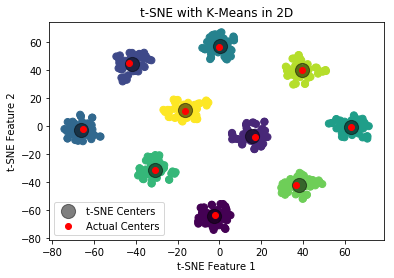

10


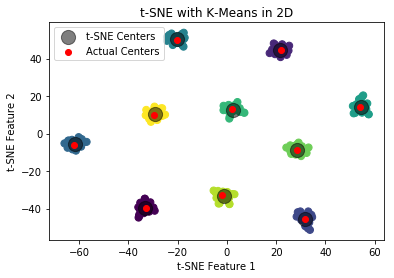

20


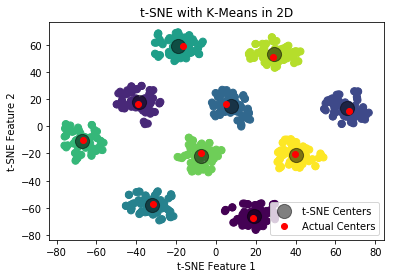

In [975]:
num_dims = 100
for max_sigma in [5,10,20]:
    print max_sigma
    cluster_dict,overall_pts = gen_clusters(20,10,max_mean,max_sigma,100)
    cluster_centers, timeit, ss_error = run_tsne(overall_pts,10,cluster_dict,plot=True)


How does the error and time change with increasing the number of clusters?

In [988]:
num_dims = 100
tsne_cluster_time_li = []
tsne_cluster_err_li = []
max_sigma = 10
#for max_sigma in range(2,32,2):
for num_clusters in range(4,21,4):
    print num_clusters
    inter_time_li = []
    inter_err_li = []
    for i in range(0,10):
        try:
            cluster_dict,overall_pts = gen_clusters(num_dims,num_clusters,max_mean,max_sigma,50)
            cluster_centers, timeit, ss_error = run_tsne(overall_pts,10,cluster_dict)
            inter_time_li.append(timeit)
            inter_err_li.append(ss_error)
        except ValueError:
            pass
    tsne_cluster_time_li.append(min(inter_time_li))
    tsne_cluster_err_li.append(min(inter_err_li))

4
8
12
16
20


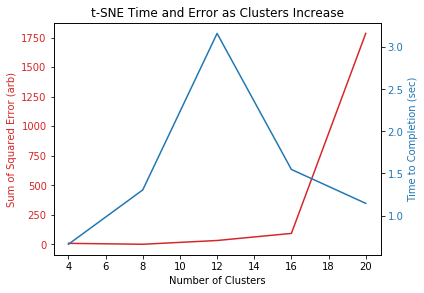

In [989]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot(range(4,21,4), tsne_cluster_err_li, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(4,21,4), tsne_cluster_time_li, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('t-SNE Time and Error as Clusters Increase')
plt.show()

How does the error and time change with increasing the number of dimensions?

In [990]:
max_sigma = 10
num_clusters=10
tsne_dims_time = []
tsne_dims_error = []
for n_dims in [5,10,15,20,25]:
    print 'Dimensions: '+str(n_dims)
    inter_li_time = []
    inter_li_error = []
    for i in range(0,10):
        try:
            cluster_dict,overall_pts = gen_clusters(n_dims,num_clusters,100,max_sigma,50)
            cluster_centers, timeit, ss_error = run_tsne(np.array(overall_pts),\
                                                                           num_clusters,cluster_dict)
            inter_li_time.append(timeit)
            inter_li_error.append(ss_error)
        except ValueError:
            pass
    tsne_dims_time.append(min(inter_li_time))
    tsne_dims_error.append(min(inter_li_error))

Dimensions: 5
Dimensions: 10
Dimensions: 15
Dimensions: 20
Dimensions: 25


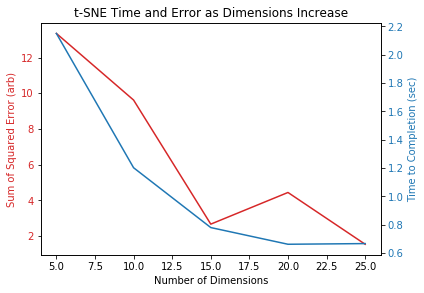

In [991]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Dimensions')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot([5,10,15,20,25], tsne_dims_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot([5,10,15,20,25], tsne_dims_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('t-SNE Time and Error as Dimensions Increase')
plt.show()

What about changing the variance?

In [992]:
tsne_sigma_time = []
tsne_sigma_error = []
for n_sigma in range(5,31,5):
    print n_sigma
    inter_li_time = []
    inter_li_error = []
    for i in range(0,10):
        try:
            cluster_dict,overall_pts = gen_clusters(10,8,100,n_sigma,50)
            cluster_centers, timeit, ss_error = run_tsne(np.array(overall_pts),\
                                                                                   num_clusters,cluster_dict)
            inter_li_time.append(timeit)
            inter_li_error.append(ss_error)
        except ValueError:
            pass
    tsne_sigma_time.append(min(inter_li_time))
    tsne_sigma_error.append(min(inter_li_error))

5
10
15
20
25
30


[1.2467279434204102, 2.408926010131836, 0.8795249462127686, 1.3523859977722168, 1.1088252067565918, 0.9726319313049316]


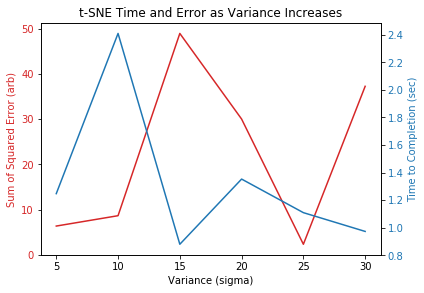

In [993]:
fig, ax1 = plt.subplots()
print tsne_sigma_time
color = 'tab:red'
ax1.set_xlabel('Variance (sigma)')
ax1.set_ylabel('Sum of Squared Error (arb)', color=color)
ax1.plot(range(5,31,5), tsne_sigma_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time to Completion (sec)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(5,31,5), tsne_sigma_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('t-SNE Time and Error as Variance Increases')
plt.show()